# Delete

In [1]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import pimc # custom module
from scipy.stats import truncexpon
from scipy.integrate import quad, simps
import importlib
importlib.reload(pimc)

<module 'pimc' from '/Users/ecasiano/Desktop/LatticePIMC/src/pimc.py'>

### Simulation parameters

In [2]:
# Simulation parameters
t = 0
U = 1
mu = 2
    
# PIMC parameters
beta = 1
eta = 1      # worm end fugacity

# Canonical or Grand Canonical?
canonical = False

### Create a worldline configuration (with a worm)

head_loc:  []
tail_loc:  []


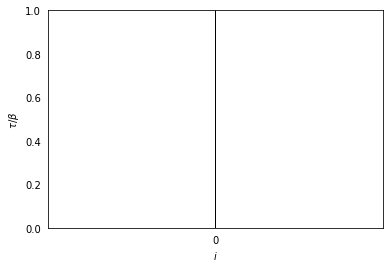

In [3]:
importlib.reload(pimc)
# Create a worldline configuration
L = 1
N = 1
alpha = []
for i in range(L):
    alpha.append(N)
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []
    
print("head_loc: ",head_loc)
print("tail_loc: ",tail_loc)
#print("worm_length: %.16f"%(tau_h-tau_t))

pimc.view_worldlines(data_struct,beta,figure_name=None);

### Apply delete many times

In [4]:
importlib.reload(pimc)
mc_steps = int(2E+05)
delete = 0 # delete acceptance counter
proposals = 0
for m in range(mc_steps):
    
    # try to insert a worm/antiworm
    pimc.worm_insert(data_struct, beta, head_loc, tail_loc, U, mu, eta,canonical, N)
    if head_loc != [] and tail_loc != []:
        proposals += 1
        delete += pimc.worm_delete(data_struct,beta,head_loc,tail_loc,U,mu,eta,canonical,N)

In [5]:
# Acceptance ratio
print("Acceptance: %.4f%%"%(100*delete/proposals))

Acceptance: 47.3608%


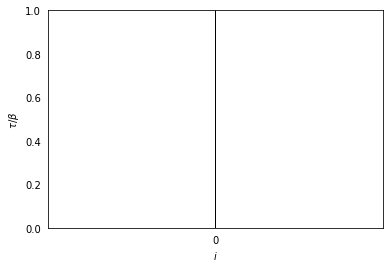

In [6]:
pimc.view_worldlines(data_struct,beta,figure_name=None);

In [99]:
proposals

157425